# Random Forest

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("penguins.csv")
df.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [14]:
df.isnull().sum().sum()

np.int64(18)

In [15]:
df = df.dropna()
df.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [16]:
df = df[df["sex"] !="."]
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


# Train Test Split

In [34]:
x = pd.get_dummies(df.drop("species",axis=1) ,drop_first=True)
y= df["species"]

In [35]:
x

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,True,True
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,False
340,46.8,14.3,215.0,4850.0,False,False,False
341,50.4,15.7,222.0,5750.0,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,False


In [37]:
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=9)

# Random Forest Model

In [22]:
from sklearn.ensemble import RandomForestClassifier  

In [38]:
model= RandomForestClassifier(n_estimators=29 , max_features="sqrt" 
, random_state=9)

model.fit(X_train,y_train)

# n_estimators : agac sayısı

 

RandomForestClassifier(n_estimators=29, random_state=9)

In [24]:
pengu_pred = model.predict(X_test)

# Değerlendirme

In [25]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , classification_report , accuracy_score

In [26]:
confusion_matrix(y_test , pengu_pred)

array([[44,  1,  1],
       [ 0, 23,  0],
       [ 0,  0, 31]])

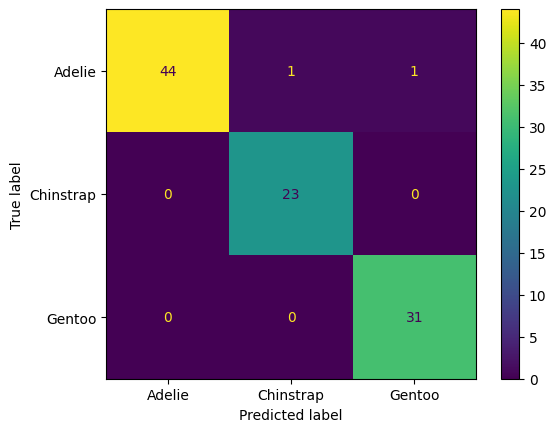

In [27]:
ConfusionMatrixDisplay.from_estimator(model , X_test , y_test)

In [28]:
print(classification_report(y_test,pengu_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.96      0.98        46
   Chinstrap       0.96      1.00      0.98        23
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.98       100
   macro avg       0.98      0.99      0.98       100
weighted avg       0.98      0.98      0.98       100



In [29]:
model.feature_importances_

array([0.36143716, 0.16340641, 0.19981389, 0.11083695, 0.13315094,
       0.02740611, 0.00394855])

In [30]:
hata = []

for n in range(1,99):
    model = RandomForestClassifier(n_estimators= n , max_features="sqrt" , random_state=9)

    model.fit(X_train , y_train)
    deneme_pred= model.predict(X_test)
    hata.append(1-accuracy_score(y_test , deneme_pred))

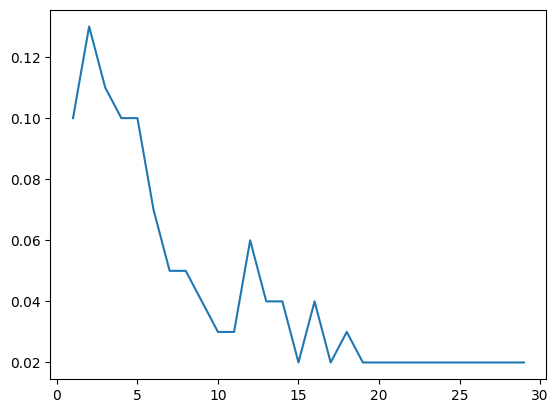

In [31]:
plt.plot(range(1,30) , hata[:29] , label="Hata Oranı")

#İlk 99 a baktık ama zaten hatalar hep ilk 30 da oluştuğundan böyle yaptık

En son olarak burada çıkan değeri n_estimator değerinin yerine koyuyoruz.En iyi parametreyi seçmeye özen gösterin.

22 35 65 hepsi bizim için bu tree de aynı değere özgüdür.Zaten hata sayılarını yukarıda gösterildi

# final model

In [82]:
final_model= RandomForestClassifier(n_estimators=20 , max_features="sqrt" , random_state=9)

In [83]:
final_model.fit(X_train ,y_train)


RandomForestClassifier(n_estimators=20, random_state=9)

In [84]:
final_pred = final_model.predict(X_test)

In [85]:
confusion_matrix(y_test,final_pred)

array([[44,  1,  1],
       [ 0, 23,  0],
       [ 0,  0, 31]])

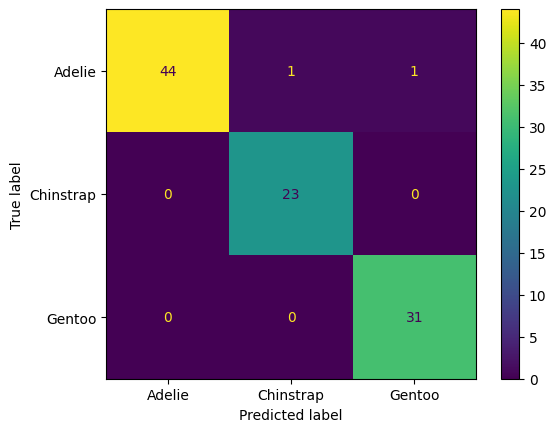

In [86]:
ConfusionMatrixDisplay.from_estimator(final_model , X_test , y_test)

In [63]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
